In [167]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

In [169]:
#command to print all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [170]:
loan_df = pd.read_csv('loan.csv',low_memory=False)

### DATA CLEANING

#### Fixing Rows

#### The target variable is **loan_status**

In [171]:
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

**The loan_status has 3 unique values Fully Paid, Charged off, Current**<br> Since 'Current' indicates that the loan is still active and payments are ongoing,<br> including such instances might not provide insights into the factors influencing loan default.<br> Hence removing rows with status as Current.

In [172]:
#Removing rows with status Current
loan_df = loan_df[loan_df['loan_status'] != 'Current']

In [173]:
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

#### Fixing Columns
Removing the columns with more than 95% of null value

In [174]:
# Calculate the percentage of null values in each column
null_percentage = (loan_df.isnull().sum() / len(loan_df)) * 100

# Identify columns with more than 95% null values
columns_to_drop = null_percentage[null_percentage > 90].index

# Drop columns with more than 95% null values
loan_df = loan_df.drop(columns=columns_to_drop, axis=1)

In [175]:
#checking the null value percentile of remaining columns
(loan_df.isnull().sum() / len(loan_df)) * 100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.185033
emp_length                     2.677761
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.477901
purpose                        0.000000
title                          0.028514
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


Demographic & Customer Behavioural data to be removed since they are non required columns
<br>
1.id - unique value not required
<br>
2.member_id - unique value not required
<br>
3.acc_now_delinq - empty
<br>
4.funded_amnt - not useful, funded_amnt_inv is useful which is funded to person
<br>
5.emp_title - brand names not useful
<br>
6.pymnt_plan - fixed value as n for all
<br>
7.url - not useful
<br>
8.desc - can be applied some NLP but not for EDA
<br>
9.title - too many distinct values not useful
<br>
10.zip_code - complete zip is not available
<br>
11.delinq_2yrs - post approval feature
<br>
12.mths_since_last_delinq - only half values are there, not much information
<br>
13.mths_since_last_record - only 10% values are there
<br>
14.revol_bal - post/behavioural feature
<br>
15.initial_list_status - fixed value as f for all
<br>
16.out_prncp - post approval feature
<br>
17.out_prncp_inv - not useful as its for investors
<br>
18.total_pymnt - post approval feature
<br>
19.total_pymnt_inv - not useful as it is for investors
<br>
20.total_rec_prncp - post approval feature
<br>
21.total_rec_int - post approval feature
<br>
22.total_rec_late_fee - post approval feature
<br>
23.recoveries - post approval feature
<br>
24.collection_recovery_fee - post approval feature
<br>
25.last_pymnt_d - post approval feature
<br>
26.last_credit_pull_d - irrelevant for approval
<br>
27.last_pymnt_amnt - post feature
<br>
28.next_pymnt_d - post feature
<br>
29.collections_12_mths_ex_med - only 1 value 
<br>
30.policy_code - only 1 value
<br>
31.acc_now_delinq - single valued
<br>
32.chargeoff_within_12_mths - post feature
<br>
33.delinq_amnt - single valued
<br>
34.tax_liens - single valued
<br>
35.application_type  percentile<br> single
<br>
36.pub_rec_bankruptcies - single valued for more than 99%
<<br>b37.addr_state - may not depend on location as its in financial domain
<br>>
addr_state - may not depend on location as its in financial domain
<br>n location as its in financial domainn location as its in financial domain

In [176]:
colsToDrop = ["id", "member_id", "funded_amnt", "emp_title", "pymnt_plan", "url", "desc", "title", "zip_code", "delinq_2yrs", "mths_since_last_delinq", "revol_bal", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens", "application_type", "pub_rec_bankruptcies", "addr_state"]

In [177]:
loan_df.drop(colsToDrop, axis=1, inplace=True)

In [178]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

#### Changing the int_rate to numeric type and remove %

In [179]:
loan_df["int_rate"] = pd.to_numeric(loan_df["int_rate"].apply(lambda x:x.split('%')[0]))

#### Removing months from the column term and store as numerical

In [180]:
loan_df.term
loan_df["term"] = pd.to_numeric(loan_df["term"].apply(lambda x:x.split()[0]))

#### Removing % from revol_util column and converting to numericc data type

In [181]:
#removing % and changing the datatypes
loan_df["revol_util"] = pd.to_numeric(loan_df["revol_util"].apply(lambda x: str(x).split('%')[0] if pd.notnull(x) else x))

#### Updating emp_length column 
considering 0 to ,1 year as 0 and 10+ year as 10

In [182]:
# loan_df["emp_length"]

In [183]:
loan_df["emp_length"] = pd.to_numeric(loan_df["emp_length"].apply(lambda x: 0 if pd.isnull(x) or "<" in str(x) else (int(str(x).split('+')[0]) if "+" in str(x) else int(str(x).split()[0]))))

In [184]:
loan_df["emp_length"].value_counts()

emp_length
10    8488
0     5541
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

In [185]:
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

loan_amnt              0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
dti                    0.00
earliest_cr_line       0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_util             0.13
total_acc              0.00
dtype: float64

Removing the rows with null values

In [186]:
loan_df.dropna(axis=0, subset=["emp_length"], inplace=True)

In [187]:
loan_df.dropna(axis=0, subset=["revol_util"], inplace=True)

In [188]:
# loan_df.purpose

In [189]:
# Check the types of purposes for which the loan has taken as this is one of the factor which we would use in our analysis

(loan_df.purpose.value_counts()*100)/len(loan_df)

purpose
debt_consolidation    46.832092
credit_card           13.042801
other                  9.998183
home_improvement       7.449321
major_purchase         5.564928
small_business         4.550056
car                    3.885587
wedding                2.400914
medical                1.762400
moving                 1.489864
vacation               0.970748
house                  0.952579
educational            0.835778
renewable_energy       0.264749
Name: count, dtype: float64

In [190]:
# Since we do not know what the term "others" stands for in the purpose we would get rid of it.

loan_df.drop(loan_df[loan_df.purpose == 'other'].index, inplace=True)

In [191]:
# Converting format and data types for a few columns in the dataset.
loan_df['term'] = loan_df['term'].astype(int)
loan_df['grade'] = loan_df['grade'].astype('category')
loan_df['sub_grade'] = loan_df['sub_grade'].astype('category')
loan_df['home_ownership'] = loan_df['home_ownership'].astype('category')
loan_df['verification_status'] = loan_df['verification_status'].astype('category')
loan_df['purpose'] = loan_df['purpose'].astype('category')


#### Removing the outliers

In [192]:
# for annual_inc, the highest value is 6000000 where 75% quantile value is 83000, and is 100 times the mean
# we need to remomve outliers from annual_inc i.e. 99 to 100%
nn_quartile = loan_df['annual_inc'].quantile(0.99)
loan_df = loan_df[loan_df["annual_inc"] < nn_quartile]
# loan_df["annual_inc"].describe()

In [193]:
# for open_acc, the highest value is 44 where 75% quantile value is 12, and is 5 times the mean
# we need to remomve outliers from open_acc i.e. 99.9 to 100%
open_acc_q = loan_df["open_acc"].quantile(0.999)
loan_df = loan_df[loan_df["open_acc"] < open_acc_q]
# loan_df['open_acc'].describe()

In [194]:
# for total_acc, the highest value is 90 where 75% quantile value is 29, and is 4 times the mean
# we need to remomve outliers from total_acc i.e. 98 to 100%
total_acc_q = loan_df["total_acc"].quantile(0.98)
loan_df = loan_df[loan_df["total_acc"] < total_acc_q]

In [195]:
# we need to remomve outliers from pub_rec i.e. 99.5 to 100%
pub_rec_q = loan_df["pub_rec"].quantile(0.995)
loan_df = loan_df[loan_df["pub_rec"] <= pub_rec_q]

#### DERIVED METRICS

In [196]:
# Extract Year and month from Issue_Date to seperate columns
loan_df[['issue_month', 'issue_year']] = loan_df['issue_d'].str.split('-', expand=True)
loan_df['issue_year'] = '20' + loan_df['issue_year']
loan_df.issue_month.dtypes

# loan_df['issue_month'] = pd.to_numeric(loan_df['issue_month'], errors='coerce')
# loan_df['issue_year'] = pd.to_numeric('20' + loan_df['issue_year'], errors='coerce')
# print(loan_df[['issue_month', 'issue_year']].dtypes)

dtype('O')

In [197]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,Dec,2011
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,Dec,2011
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,Dec,2011
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,Dec,2011
6,7000,7000.0,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51,Jul-05,1,7,0,85.6,11,Dec,2011


In [198]:
# create a new column for loan to income ratio
loan_df['loan_inc_ratio']= 100*(loan_df['loan_amnt']/loan_df['annual_inc'])

In [199]:
# create a new column for loan to income ratio
loan_df['loan_inc_ratio']= 100*(loan_df['loan_amnt']/loan_df['annual_inc'])

In [200]:
# Categorise the loan_inc_ratio column into categorised_loan_inc_ratio column as follows :
# < 10 is Low
# Between 10 and 16 (both inclusive) is Medium
# 17 and 24 are High
# >= 25 is Very High

def loan_inc_ratio_category(n):
    if n < 10:
        return 'Low'
    elif n >=10 and n < 17:
        return 'Medium'
    elif n >= 17 and n < 25:
        return 'High'
    else:
        return 'Very High'
    
loan_df['categorised_loan_inc_ratio'] = loan_df['loan_inc_ratio'].apply(loan_inc_ratio_category)
# loan_df.head()

In [201]:
# Get the 25%, 50% and 75% quartiles of the int_rate column for categorisation
loan_df['int_rate'].quantile([.25, .5, .75])

0.25     8.94
0.50    11.71
0.75    14.38
Name: int_rate, dtype: float64

In [202]:
# Categorise the int_rate column into categorised_int_rate_perc (percentage) column as follows :
# < 9% is Low
# Between 9% and 11% (both inclusive) is Medium
# 12% and 13% are High
# >= 14% is Very High

def interest_rates(n):
    if n < 9:
        return 'Low'
    elif n >=9 and n < 12:
        return 'Medium'
    elif n >= 12 and n < 14:
        return 'High'
    else:
        return 'Very High'
    
loan_df['categorised_int_rate_perc'] = loan_df['int_rate'].apply(interest_rates)

In [203]:
# Get the 25%, 50% and 75% quartiles of the emp_length column for categorisation
loan_df['emp_length'].quantile([.25, .5, .75])

0.25    2.0
0.50    4.0
0.75    8.0
Name: emp_length, dtype: float64

In [204]:
# Categorise the emp_length column into categorised_emp_length column as follows :
# < 9 is Entry Level
# Between 2 and 4 (both inclusive) is Junior Level
# Between 4 and 8 (noth inclusive) is Middle Level
# >= 9 is Senior Level

def emp_length_category(n):
    if n < 2:
        return 'Entry Level'
    elif n >=2 and n < 4:
        return 'Junior Level'
    elif n >= 4 and n < 9:
        return 'Middle Level'
    else:
        return 'Senior Level'
    
loan_df['categorised_emp_length'] = loan_df['emp_length'].apply(emp_length_category)


In [205]:
# Get the 25%, 50% and 75% quartiles of the annual_inc column for categorisation
loan_df['annual_inc'].quantile([.25, .5, .75])

0.25    40315.0
0.50    58000.0
0.75    80000.0
Name: annual_inc, dtype: float64

In [206]:
# Categorise the annual_in column into categorised_annual_inc column as follows :
# < 41000 is low
# Between 41000 and 59000 (both inclusive) is Medium
# Between 60000 and 82000 (both inclusive) is High
# >= 83000 is Very High

def annual_income_category(n):
    if n < 41000:
        return 'Low'
    elif n >=41000 and n < 60000:
        return 'Medium'
    elif n >= 60000 and n < 83000:
        return 'High'
    else:
        return 'Very High'
    
loan_df['categorised_annual_inc'] = loan_df['annual_inc'].apply(annual_income_category)

In [207]:
# Get the 25%, 50% and 75% quartiles of thedti ( debt to income ratio) column for categorisation
loan_df['dti'].quantile([.25, .5, .75])

0.25     8.32
0.50    13.47
0.75    18.61
Name: dti, dtype: float64

In [208]:
# Categorise the dti column into categorised_dti column as follows :
# < 8 is Low
# Between 8 and 12 (both inclusive) is Medium
# Between 13 and 18 (noth inclusive) is High
# >= 19 is Very High

def dti_category(n):
    if n < 8:
        return 'Low'
    elif n >=8 and n < 13:
        return 'Medium'
    elif n >= 13 and n < 19:
        return 'High'
    else:
        return 'Very High'
    
loan_df['categorised_dti'] = loan_df['dti'].apply(dti_category)

In [209]:
# Get the 25%, 50% and 75% quartiles of the loan_amnt column for categorisation
loan_df['loan_amnt'].quantile([.25, .5, .75])

0.25     5950.0
0.50    10000.0
0.75    15000.0
Name: loan_amnt, dtype: float64

In [210]:
# Categorise the loan_amnt column into categorised_loan_amnt column as follows :
# < 5400 is Low
# Between 5400 and 9599 (both inclusive) is Medium
# Between 9600 and 14999 (noth inclusive) is High
# >= 15000 is Very High

def loan_amount_category(n):
    if n < 5400:
        return 'Low'
    elif n >=5400 and n < 9600:
        return 'Medium'
    elif n >= 9600 and n < 15000:
        return 'High'
    else:
        return 'Very High'
    
loan_df['categorised_loan_amnt'] = loan_df['loan_amnt'].apply(loan_amount_category)

The dataset has been cleaned and outliers are removed, now moving forward with different types of analysis

### Univariate Analysis



#### LOAN STATUS DISTRIBUTION

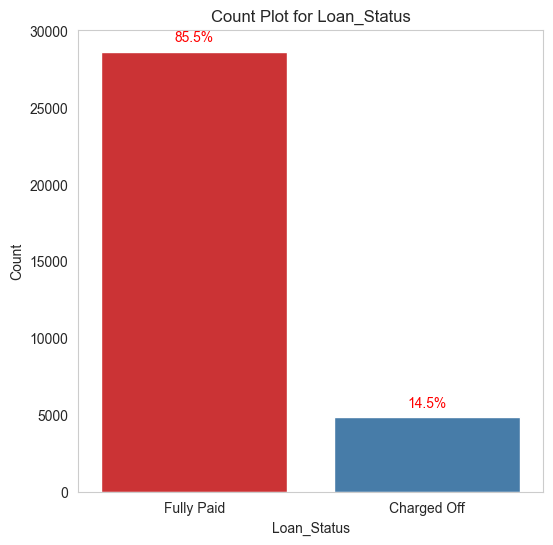

In [211]:
#loan amount distribution
# print(loan_df.loan_status.value_counts()*100/loan_df.loan_status.count())
# 0=Fully Paid, 1=Charged Off

plt.figure(figsize=(6,6))
ax = sns.countplot(data=loan_df, x='loan_status',hue='loan_status', orient='v', palette='Set1')

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), color='red', ha='center', va='bottom', xytext=(0,5), textcoords='offset points')
    plt.title(f'Count Plot for Loan_Status')
    plt.xlabel('Loan_Status')
    plt.ylabel('Count')
plt.show()

OBSERVATION <br>
1. ***85.5% of loans are fully paid or Non-Defaulted***
2. ***14.5% are Charged Off or Defaulted***

#### LOAN AMOUNT DISTRIBUTION

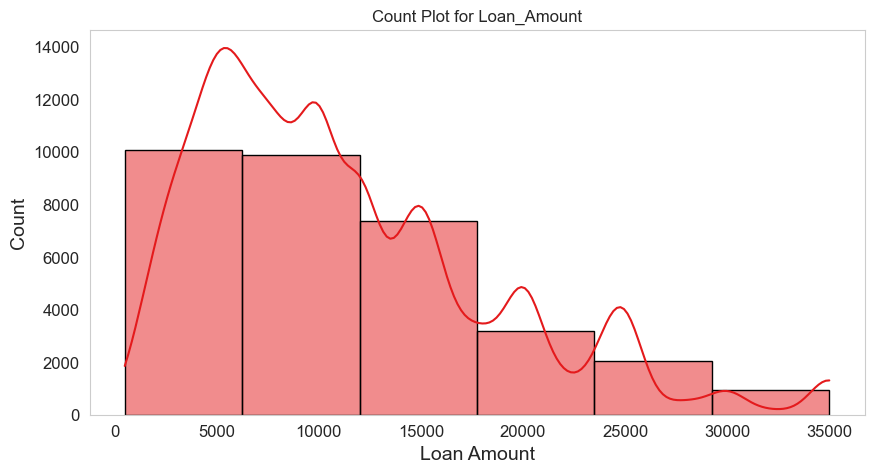

In [212]:
# print(loan_df.loan_amnt.describe())
#Plotting histogram of loan amount
plt.figure(figsize=(10,5))
ax = sns.histplot(loan_df.loan_amnt,kde=True, edgecolor='black', bins =6,)
ax.set_xlabel('Loan Amount', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.title(f'Count Plot for Loan_Amount')
ax.tick_params(axis='both', labelsize=12)
plt.show()

OBSERVATION <br> ***Loan amount is majorly spread across 6000 to 18000 approximately***

#### LOAN TERM DISTRIBUTION

term
36    74.954454
60    25.045546
Name: count, dtype: float64


<Figure size 1000x500 with 0 Axes>

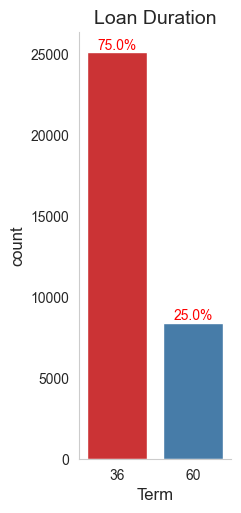

In [213]:
#Loan Term analysis
print(loan_df.term.value_counts()*100/loan_df.term.count())
plt.figure(figsize=(10,5))
plot = sns.catplot(x="term", kind="count", data=loan_df, palette="Set1", aspect= .5);
plt.title('Loan Duration', fontsize = 14)
plt.xlabel("Term", fontsize = 12)
plt.ylabel("count", fontsize = 12)
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), color='red', ha='center', va='bottom')
plt.show()

OBSERVATION - ***Majority of people prefers loan with duration of 36 months***

#### PLOT OF INTEREST RATE DISTRIBUTION

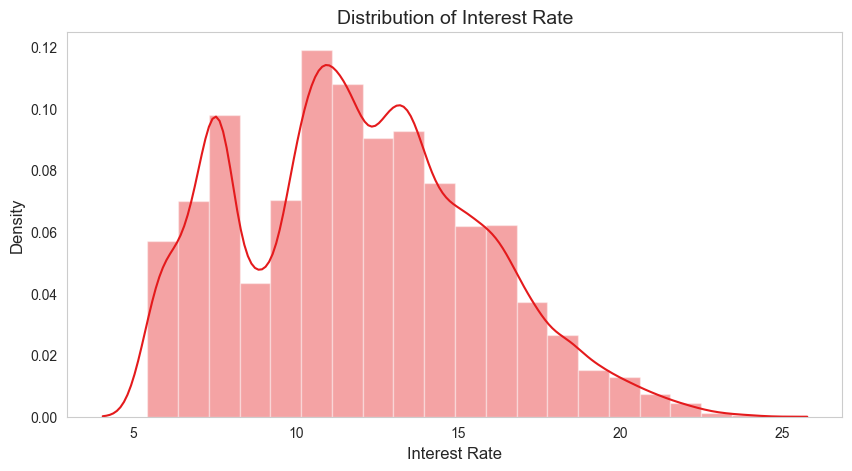

In [214]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.set_palette("Set1")
sns.distplot(sorted(loan_df.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate',fontsize = 12)
plt.ylabel('Density',fontsize = 12)
plt.title('Distribution of Interest Rate',fontsize = 14)
plt.show()

OBSERVATION - ***Interest Rate is spread majorly between 8% and 14% approximately***

#### PLOT OF GRADE DISTRIBUTION

grade
B    30.457247
A    25.971388
C    20.216229
D    13.218648
E     6.910970
F     2.466924
G     0.758594
Name: count, dtype: float64


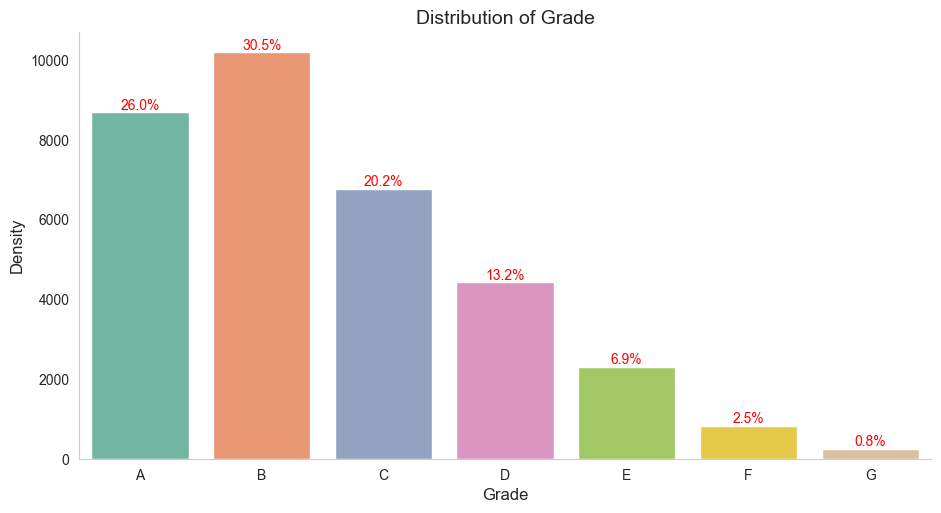

In [215]:
# Distribution of Grade
print(loan_df.grade.value_counts()*100/loan_df.term.count())
order_grade = ['A','B','C','D','E','F','G']
plot = sns.catplot(x="grade", kind="count", data=loan_df, palette="Set2", aspect= 1.9, order=order_grade);
plt.title('Distribution of Grade', fontsize = 14)
plt.xlabel("Grade", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()

OBSERVATION - ***Most Applicants fall under the grade B 30.5% followed by A 26%.***

#### PLOT OF SUBGRADE DISTRIBUTION

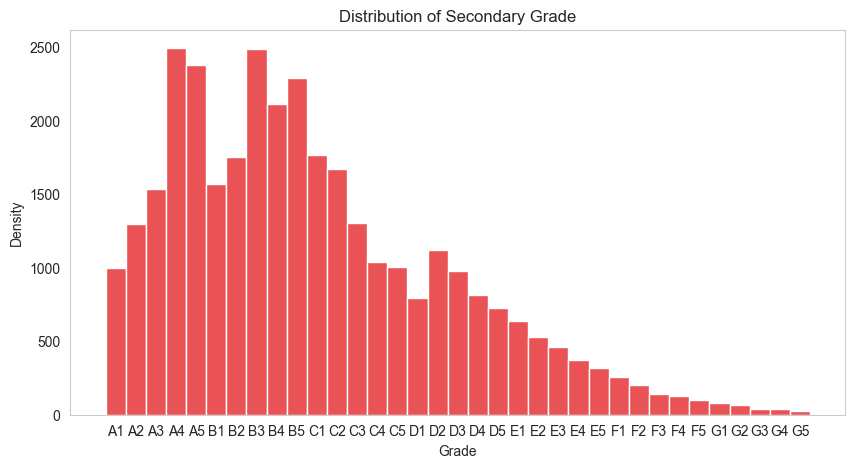

In [216]:
# Distribution of sub_grade
# print(loan_df.sub_grade.value_counts()*100/loan_df.term.count())
plt.figure(figsize=(10,5))
sns.histplot(loan_df.sub_grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

OBSERVATION - ***Majority lies in the subgrade A4,A5,B3 and B5***

#### PLOT OF EMPLOYMENT LENGTH DISTRIBUTION

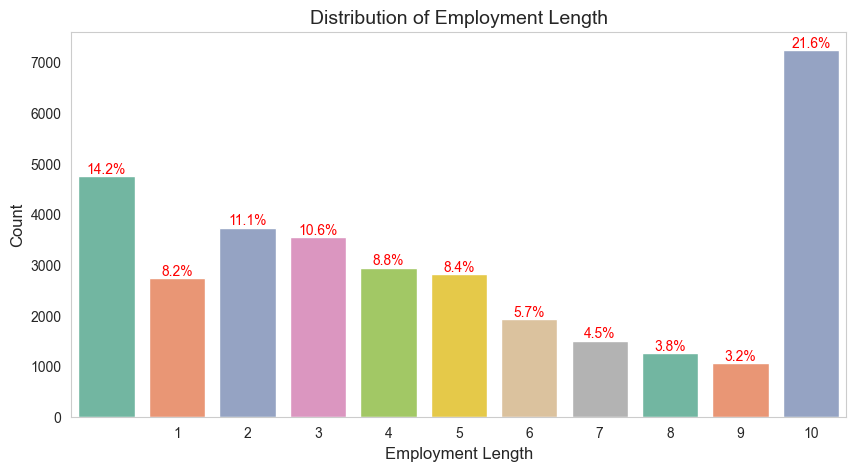

In [217]:
# Distribution of emp_length
plt.figure(figsize=(10,5))
ax = sns.countplot(data=loan_df, x='emp_length', palette='Set2')
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.xlabel('Employment Length',fontsize =12)
plt.ylabel('Count', fontsize =12)
plt.xticks(range(1, 11))
plt.title('Distribution of Employment Length',fontsize=14)
plt.show()

 OBSERVATION - ***Middle Level employ_length has max of loan with 32% distribution, 10 and 10 + years of emp_length has 21.6%***

#### PLOT OF HOME OWNERSHIP DISTRIBUTION

home_ownership
RENT        48.134874
MORTGAGE    44.091031
OWN          7.526207
OTHER        0.244900
NONE         0.002987
Name: count, dtype: float64


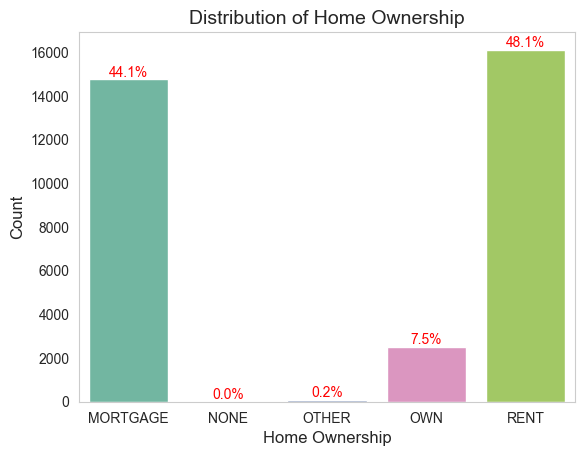

In [218]:
# Distribution of home_ownership
print(loan_df.home_ownership.value_counts()*100/loan_df.term.count())

# plt.figure(figsize=(10,5))
ax = sns.countplot(data=loan_df, x='home_ownership', palette='Set2')
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.xlabel('Home Ownership',fontsize =12)
plt.ylabel('Count', fontsize =12)
# plt.xticks(range(1, 11))
plt.title('Distribution of Home Ownership',fontsize=14)
plt.show()

OBSERVATION - ***The graph above shows that loan applicants  majorly are leaving in a rented home with 48.1% followed by Mortagage 44.1%***

#### PLOT OF ANNUAL INCOME DISTRIBUTION

count     33483.000000
mean      65319.809732
std       34741.522567
min        4000.000000
25%       40315.000000
50%       58000.000000
75%       80000.000000
max      234996.000000
Name: annual_inc, dtype: float64


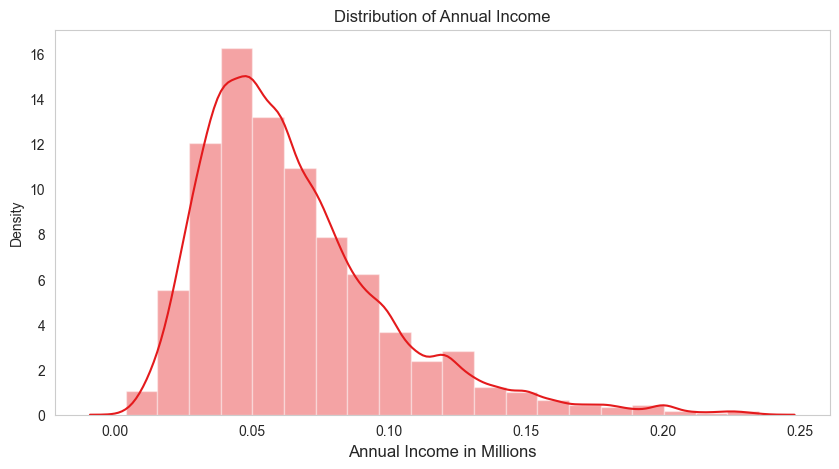

In [219]:
# Distribution of annual_inc
# print(loan_df.annual_inc.value_counts()*100/loan_df.term.count())
print(loan_df.annual_inc.describe())

plt.figure(figsize=(10,5))
sns.distplot(loan_df.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions', fontsize =12)
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

OBSERVATION - ***Annual income of majority of applicant is 40k -75k, with average annual income 65319***

#### PLOT OF VERIFICATION_STATUS DISTRIBUTION

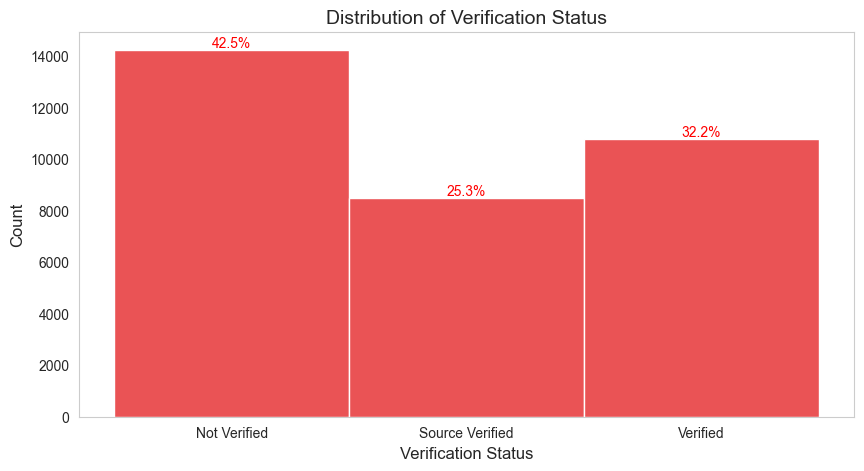

In [220]:
# Distribution of verification_status
# print(loan_df.verification_status.value_counts()*100/loan_df.term.count())

plt.figure(figsize=(10,5))
sns.set_palette("Set1")
ax = sns.histplot(loan_df.verification_status,  palette='Set2')
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.xlabel('Verification Status', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Distribution of Verification Status',fontsize=14)
plt.show()

OBSERVATION - ***From the graph we can observe that majority of loan applicants are not verified i.e 42.5%***

#### PLOT OF PURPOSE DISTRIBUTION

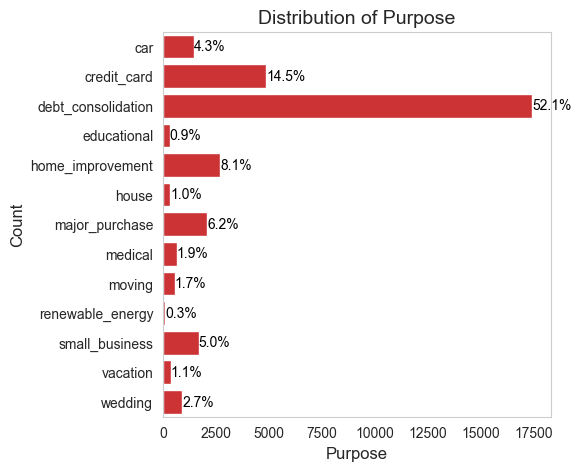

In [221]:
# Distribution of purpose
# print(loan_df.purpose.value_counts()*100/loan_df.term.count())
plt.figure(figsize=(5,5))
ax = sns.countplot(y=loan_df.purpose)
plt.title('Distribution of Purpose', fontsize = 14)
plt.xlabel("Purpose", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
for p in ax.patches:
    percentage = '{:.1f}%'.format((p.get_width() / len(loan_df)) * 100)
    ax.annotate(f'{percentage}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                color='black', ha='left', va='center')
plt.show()

OBSERVATION - ***Debt_Consolidation is the major purpose for taking loan totalling upto 52% followed by credit_card with 14.5%***

#### PLOT OF DTI DISTRIBUTION

count    33483.000000
mean        13.392330
std          6.622574
min          0.000000
25%          8.320000
50%         13.470000
75%         18.610000
max         29.990000
Name: dti, dtype: float64


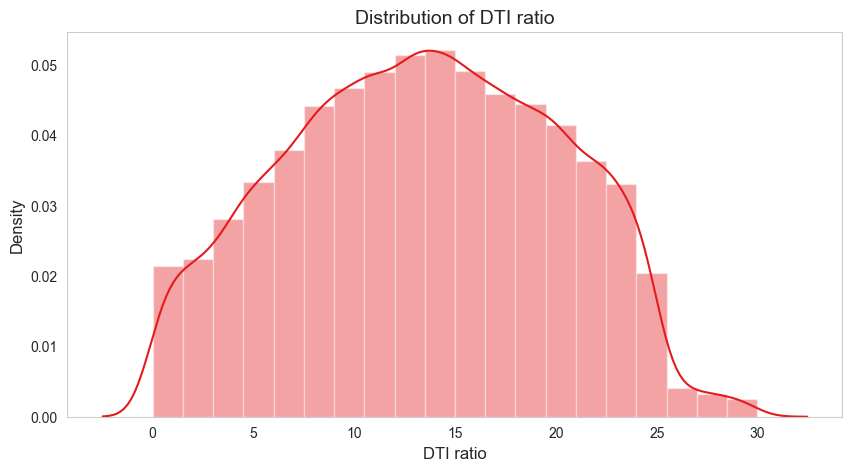

In [222]:
# Distribution of dti
print(loan_df.dti.describe())

plt.figure(figsize=(10,5))
sns.set_palette('Set1')
ax = sns.distplot(loan_df.dti,kde=True,bins=20)
plt.xlabel('DTI ratio', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of DTI ratio',fontsize=14)

plt.show()

OBSERVATION - ***Majority of dti lies between 10-20, with average of 13.39***

#### PLOT OF pub_rec_bankruptcies

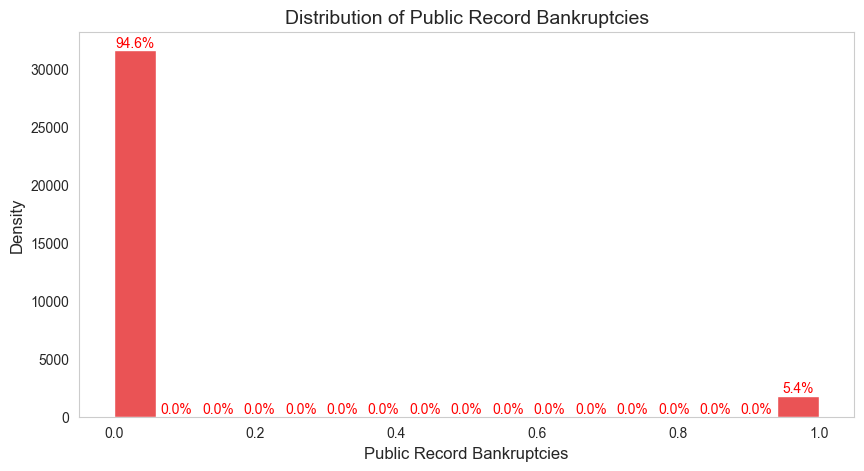

In [223]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10,5))
ax = sns.histplot(loan_df.pub_rec)
plt.xlabel('Public Record Bankruptcies', fontsize =12)
plt.ylabel('Density', fontsize =12)
plt.title('Distribution of Public Record Bankruptcies',fontsize=14)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

#### PLOT OF ISSUE_MONTH

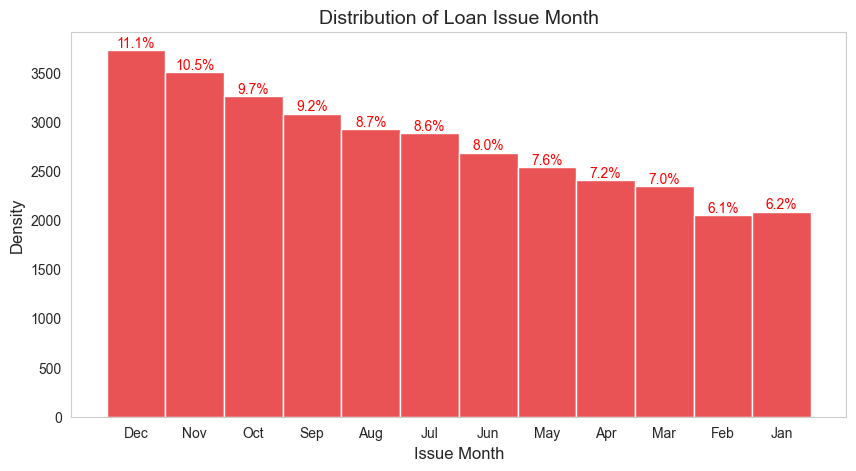

In [224]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
ax = sns.histplot(loan_df.issue_month)
plt.xlabel('Issue Month', fontsize =12)
plt.ylabel('Density', fontsize =12)
plt.title('Distribution of Loan Issue Month',fontsize=14)

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

OBSERVATION - ***Most of loans are issued in second half of year majority in December***

#### PLOT OF ISSUE_YEAR

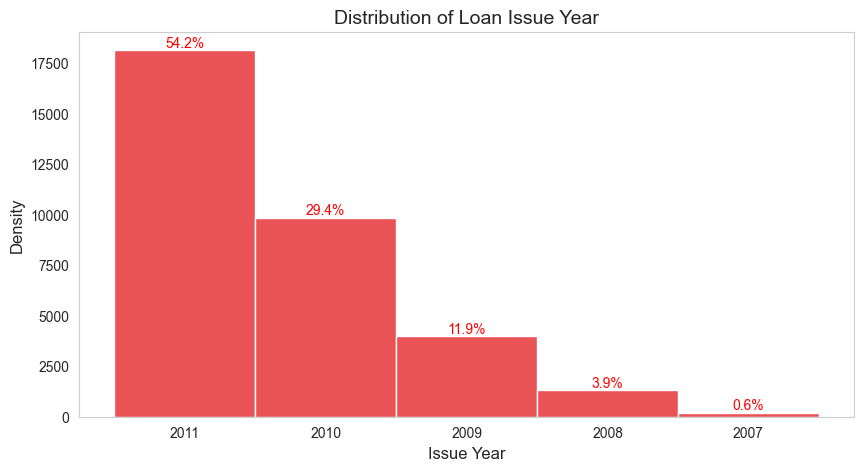

In [225]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
ax = sns.histplot(loan_df.issue_year)
plt.xlabel('Issue Year', fontsize =12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Loan Issue Year',fontsize=14)

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

OBSERVATION - ***We see increse in loans offered with years with 2011 having 54.2%***

### Segmented Univariate Analysis

#### PLOT OF LOAN_STATUS VS PURPOSE

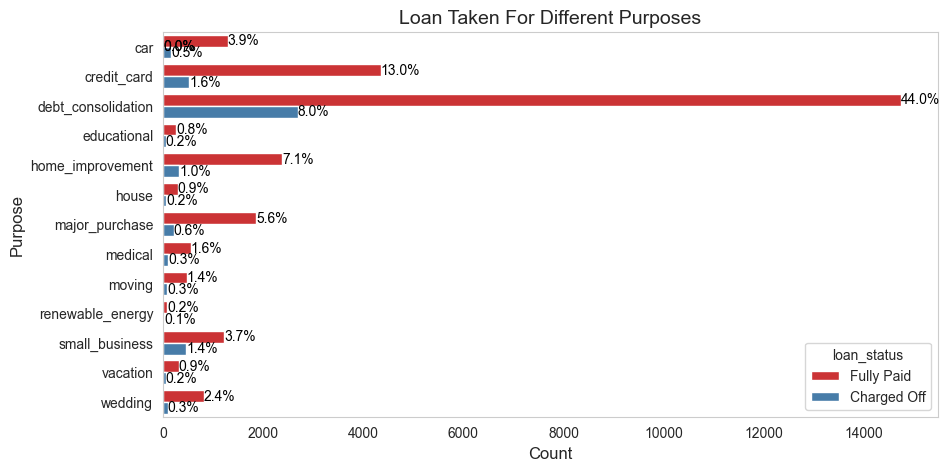

In [226]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
ax =sns.countplot(data=loan_df,y='purpose',hue='loan_status')
plt.xlabel('Count', fontsize =12)
plt.ylabel('Purpose', fontsize =12)
plt.title('Loan Taken For Different Purposes',fontsize=14)

for p in ax.patches:
        percentage = '{:.1f}%'.format((p.get_width() / len(loan_df)) * 100)
        ax.annotate(f'{percentage}',
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    color='black', ha='left', va='center')

plt.show()

#### PLOT OF loan_amnt based vs loan_status

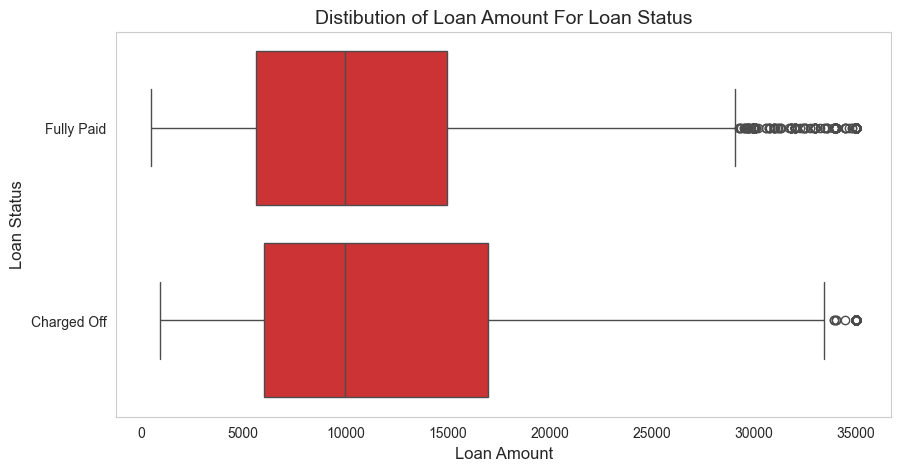

In [227]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Loan Status', fontsize=12)
plt.title('Distibution of Loan Amount For Loan Status',fontsize=14)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')


plt.show()

#### PLOT OF Term based on loan_status

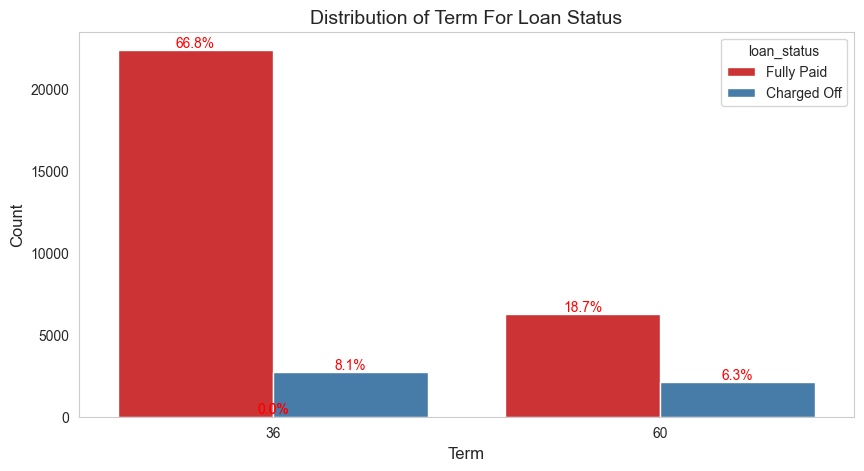

In [228]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
ax = sns.countplot(data=loan_df,x='term',hue='loan_status')
plt.xlabel('Term', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Term For Loan Status',fontsize=14)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')



plt.show()

OBSERVATION -***8.1 % of loans have been charged for term 36, followed by 6.3% in term 60***

#### PLOT OF Term based on Grade

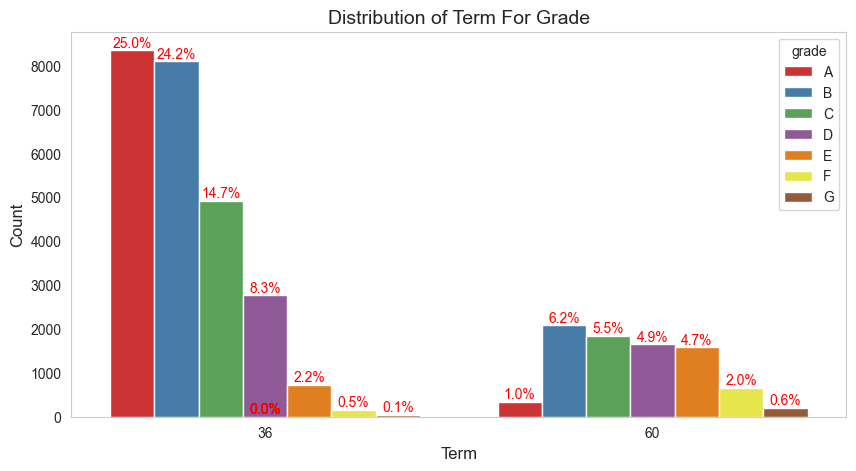

In [229]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
ax = sns.countplot(data=loan_df,x='term',hue='grade')
plt.xlabel('Term', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Term For Grade',fontsize=14)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')


plt.show()

OBSERVATION -***Majority of loans are in Grade A or B in term 36 months***

#### PLOT OF DTI VS GRADE

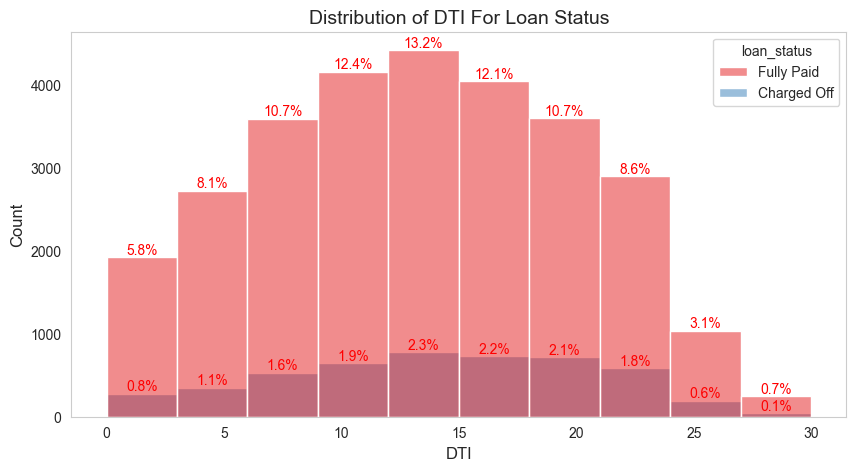

In [230]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
ax = sns.histplot(data=loan_df,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI',fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of DTI For Loan Status',fontsize=14)

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()

OBSERVATION - ***DTI for charged off is around 2.2% between 13-22***

#### PLOT OF house_ownership based on loan_status

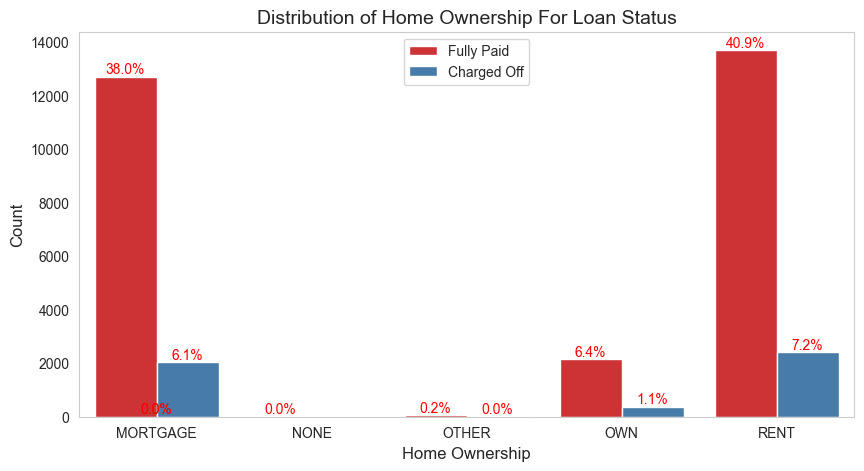

In [231]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
ax = sns.countplot(data=loan_df,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Distribution of Home Ownership For Loan Status',fontsize=14)
plt.legend(loc='upper center')

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()

OBSERVATION - ***7.2% charged off loan applicants live in a rented home, closely followed by mortgage***

#### PLOT OF ANNUAL_INCOME VS LOAN_STATUS

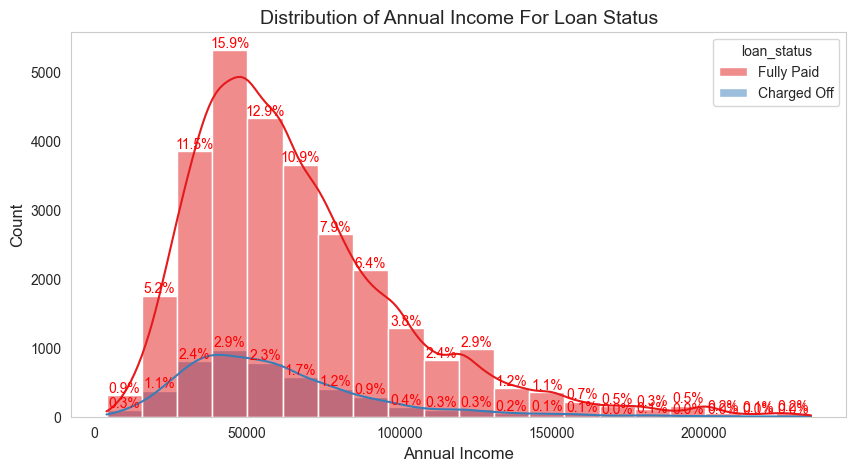

In [232]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
ax = sns.histplot(data=loan_df,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Annual Income For Loan Status',fontsize=14)

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

OBSERVATION - <br> ***1.Annual income range of 0-40K has the highest charge offs<br>
2 . Charge off ratio within the bucket of 0-40K have highest Charge Offs***

#### PLOT OF INT_AMNT VS LOAN_STATUS

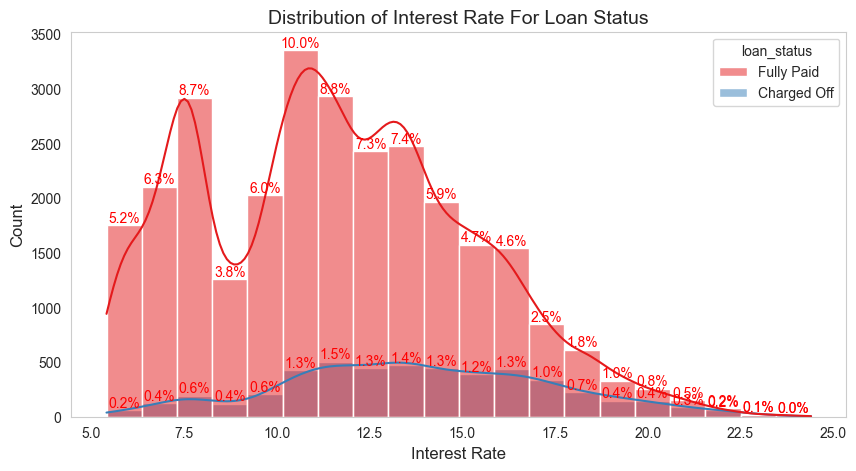

In [233]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
ax = sns.histplot(data=loan_df,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate', fontsize =12)
plt.ylabel('Count', fontsize =12)
plt.title('Distribution of Interest Rate For Loan Status',fontsize=14)

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()

OBSERVATION - <br> ***1.Majority of the loan applocations are in the category of Very Low interest rates<br> 2.Very High interest i.e 15% above are in risk of Charge Off.***

#### PLOT OF emp_length vs loan_status

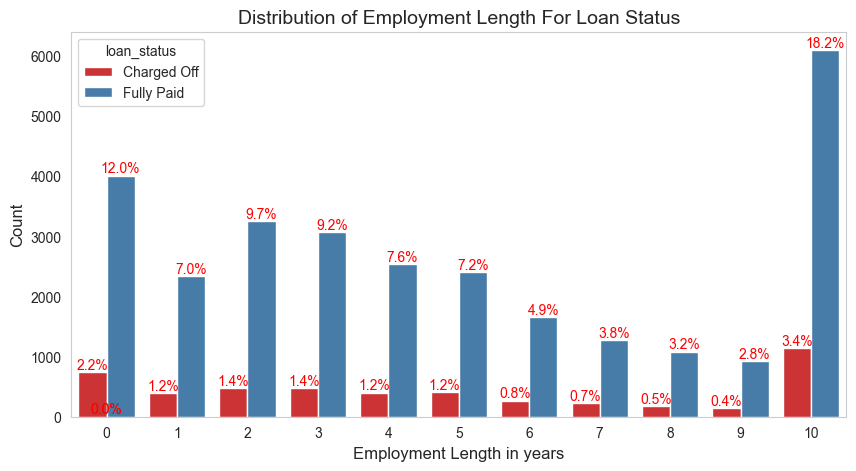

In [234]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
ax = sns.countplot(data=loan_df,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years', fontsize =12)
plt.ylabel('Count', fontsize =12)
plt.title('Distribution of Employment Length For Loan Status',fontsize=14)

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
plt.show()

OBSERVATION - ***Highest Charge Offs are in the employee length categoty of 10 Years and above***

#### PLOT OF ISSUE_YEAR VS LOAN_STATUS

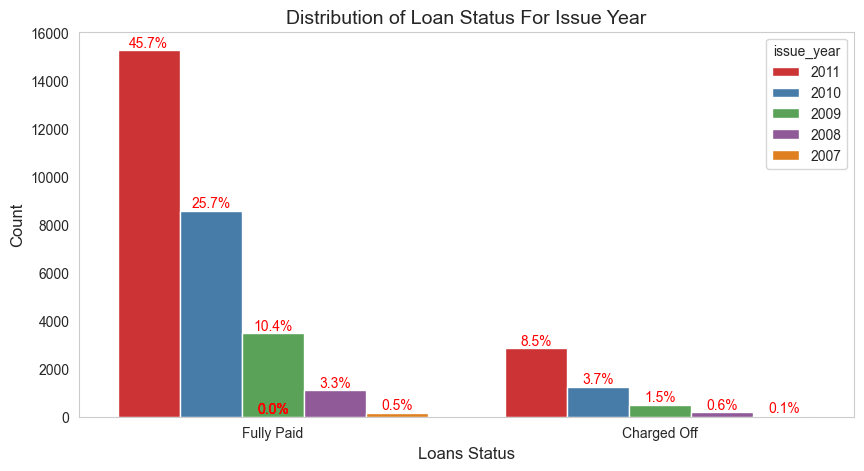

In [235]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
ax = sns.countplot(data=loan_df,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Distribution of Loan Status For Issue Year',fontsize=14)

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

OBSERVATION - ***Highest charged off are in year 2011***

### Bivariate Analysis

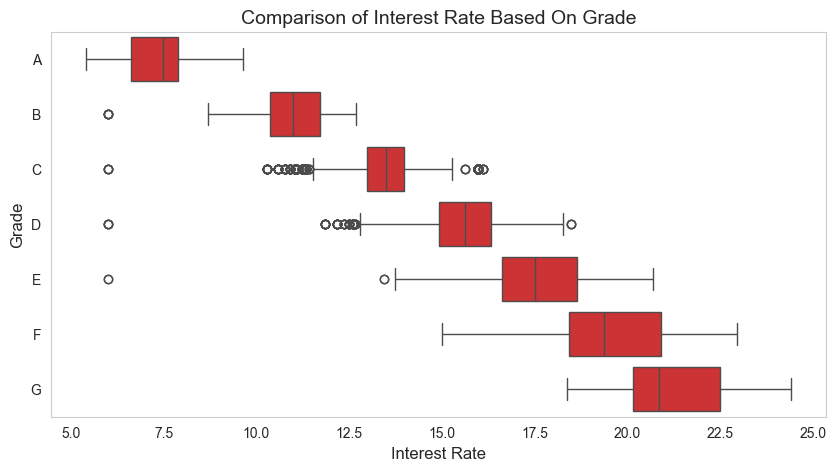

In [236]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='int_rate',y='grade')
plt.xlabel('Interest Rate',fontsize=12)
plt.ylabel('Grade',fontsize=12)
plt.title('Comparison of Interest Rate Based On Grade',fontsize=14)

for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

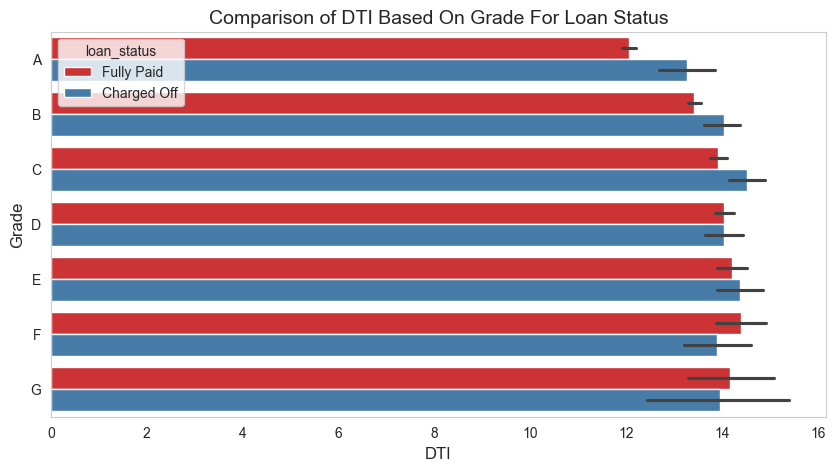

In [237]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
ax = sns.barplot(data=loan_df,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI', fontsize=12)
plt.ylabel('Grade', fontsize=12)
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=14)

plt.show()

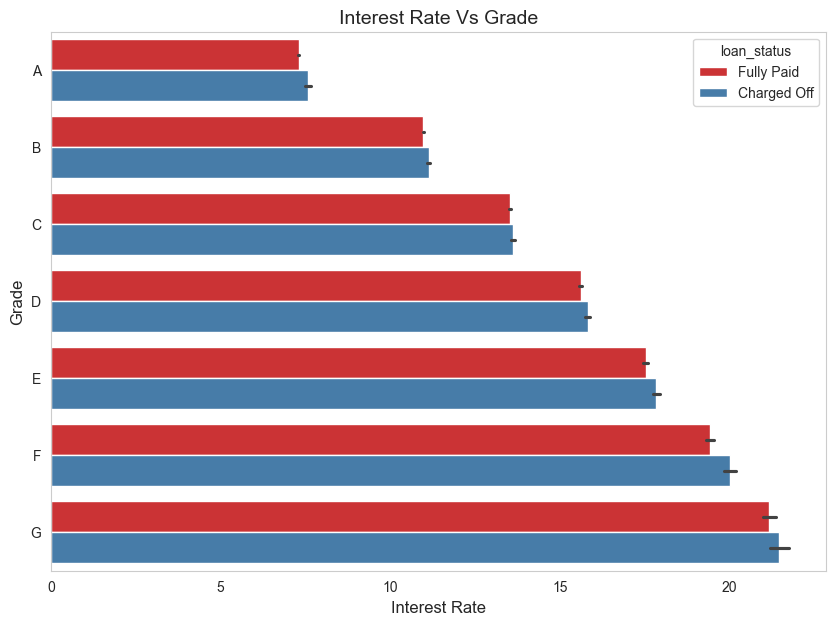

In [238]:
plt.figure(figsize=(10,7))
sns.barplot(data =loan_df,x='int_rate', y='grade', hue ='loan_status',palette="Set1", order=['A','B','C','D','E','F','G'])
plt.xlabel('Interest Rate', fontsize=12)
plt.ylabel('Grade', fontsize =12)
plt.title('Interest Rate Vs Grade',fontsize=14)

plt.show()

OBSERVATION- <br> ***1. Highest risk of charge offs are in grade B and C***

### MULTIVARIATE ANALYSIS

In [239]:
filtered_purpose_df = loan_df[(loan_df['purpose']=='debt_consolidation')
                           |(loan_df['purpose']=='credit_card')
                           |(loan_df['purpose']=='home_improvement')
                           |(loan_df['purpose']=='major_purchase')
                           |(loan_df['purpose']=='small_business')]

<Figure size 1400x700 with 0 Axes>

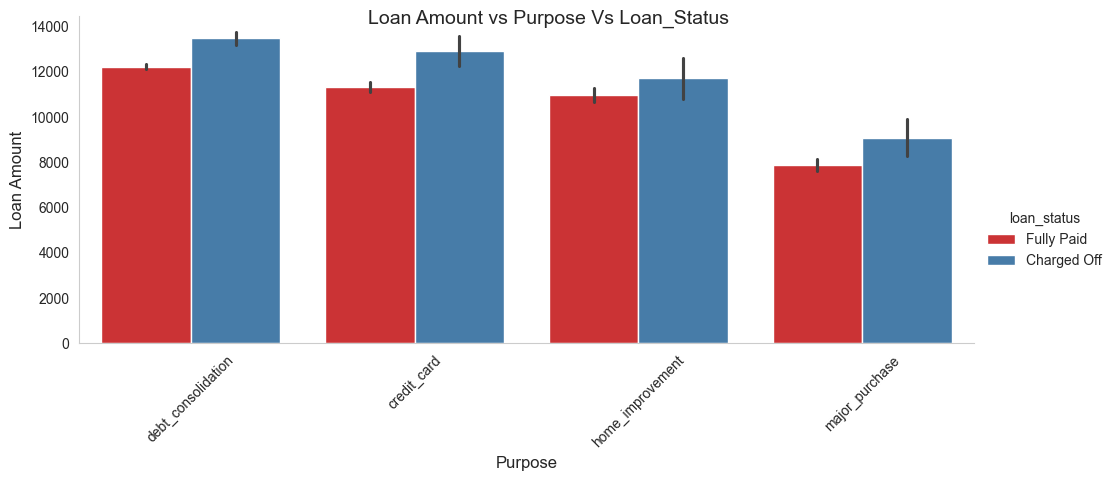

In [240]:
#Distribution of loan amount vs purpose vs loan status
top_purposes = loan_df['purpose'].value_counts().nlargest(4).index
filtered_purpose_df = loan_df[loan_df['purpose'].isin(top_purposes)]

plt.figure(figsize=(14, 7))
plot = sns.catplot(y="loan_amnt", x="purpose", hue='loan_status', data=filtered_purpose_df, palette='Set1',
                   kind="bar", height=4, aspect=2.5, order=top_purposes);

plot.fig.suptitle('Loan Amount vs Purpose Vs Loan_Status', fontsize=14)
plot.set_axis_labels('Purpose', 'Loan Amount', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [241]:
order_category = ['Low','Medium','High','Very High']
order_emp_category = ['Entry Level', 'Junior Level', 'Middle Level', 'Senior Level']
order_grade = ['A','B','C','D','E','F','G']

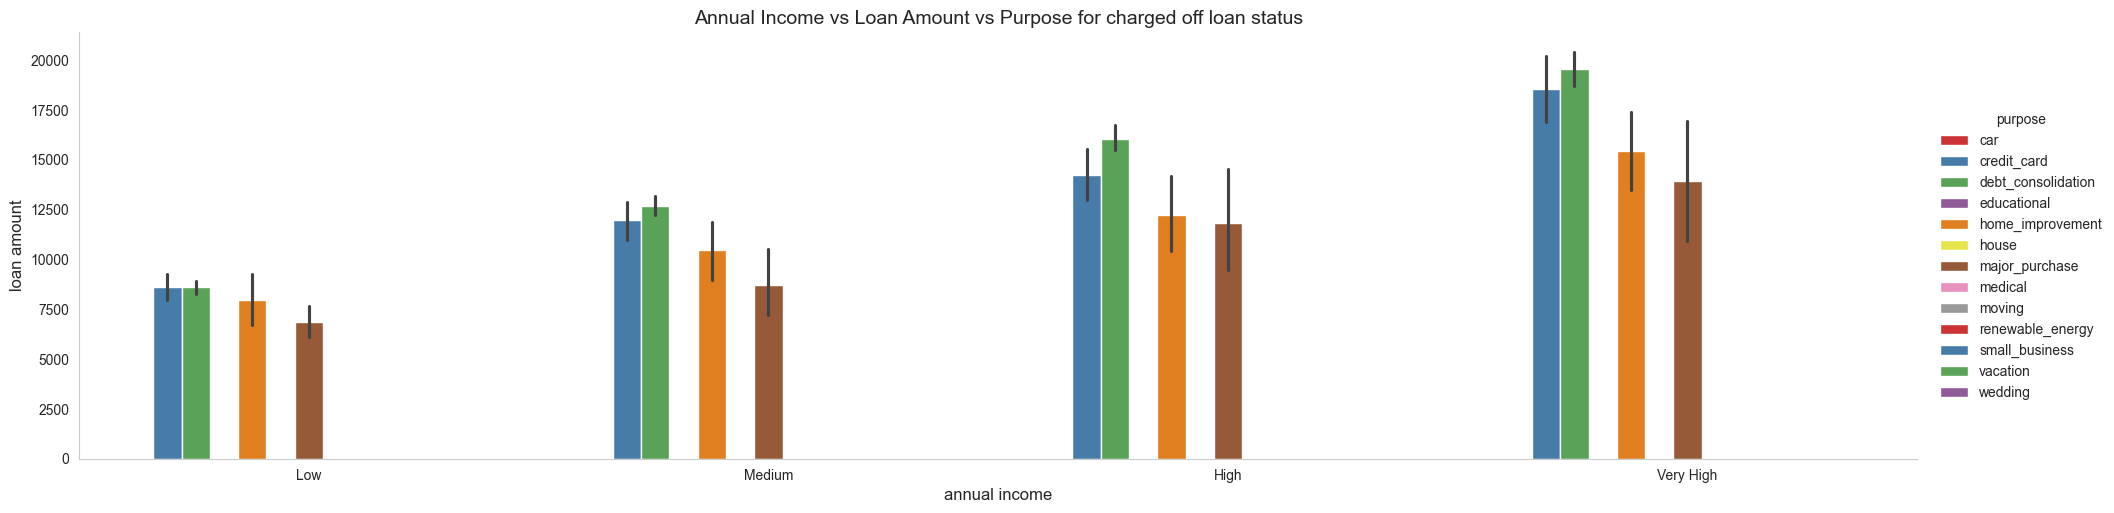

In [242]:
# Annual Income vs loan Amount vs Purpose for charged off loan Status
charged_off_filtered_purpose_df = filtered_purpose_df[(filtered_purpose_df['loan_status'] == 'Charged Off')]

plot = sns.catplot(x="categorised_annual_inc", y='loan_amnt', hue='purpose', kind="bar", data=charged_off_filtered_purpose_df,
                   palette="Set1", aspect= 3.9, order=order_category);

plt.title('Annual Income vs Loan Amount vs Purpose for charged off loan status', fontsize = 14)
plt.xlabel("annual income", fontsize = 12)
plt.ylabel("loan amount", fontsize = 12)

plt.show()

<Figure size 1200x600 with 0 Axes>

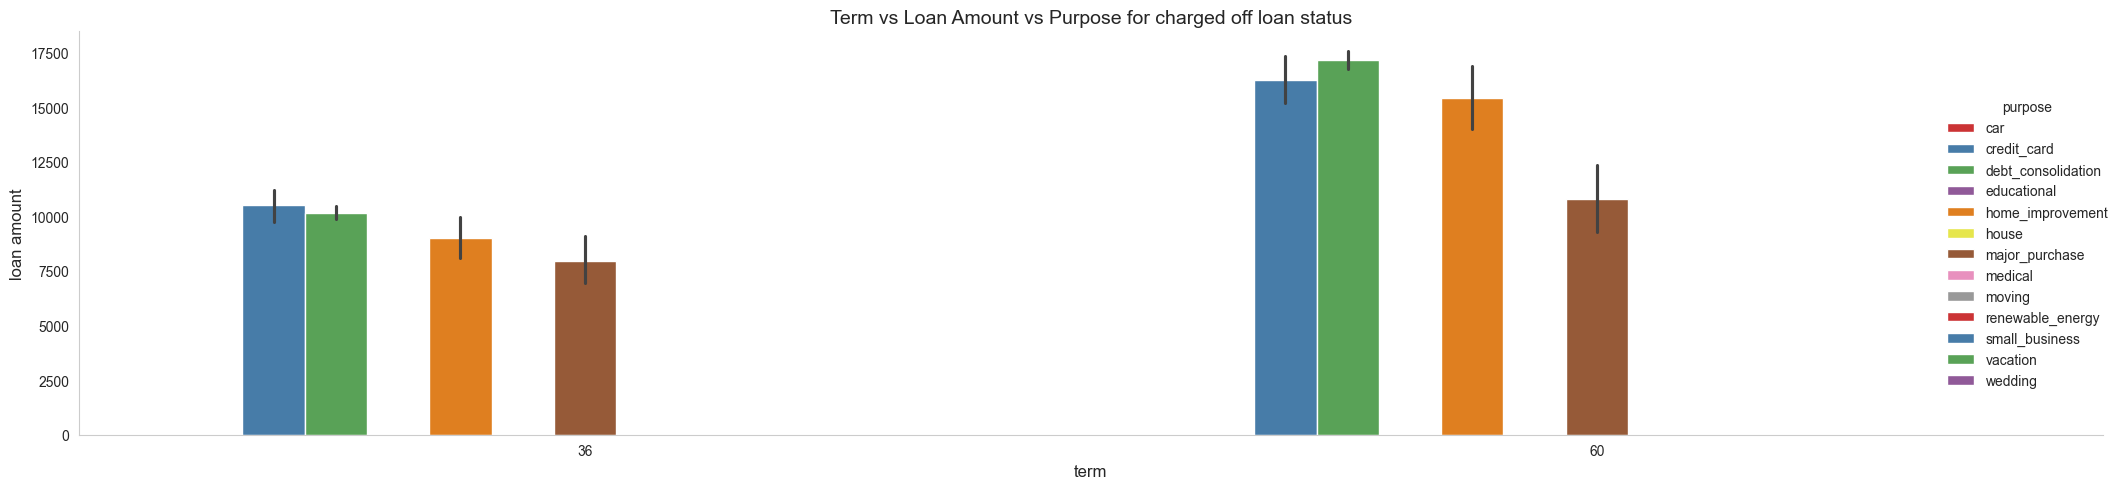

In [243]:
# Term vs loan Amount vs Purpose for charged off loan status
plt.figure(figsize=(12, 6))
plot = sns.catplot(x="term", y="loan_amnt", hue='purpose', kind="bar", data=charged_off_filtered_purpose_df, palette="Set1", 
                   aspect= 3.9);

plt.title('Term vs Loan Amount vs Purpose for charged off loan status', fontsize = 14)
plt.xlabel("term", fontsize = 12)
plt.ylabel("loan amount", fontsize = 12)
plt.tight_layout()
# Print the counts
plt.show()

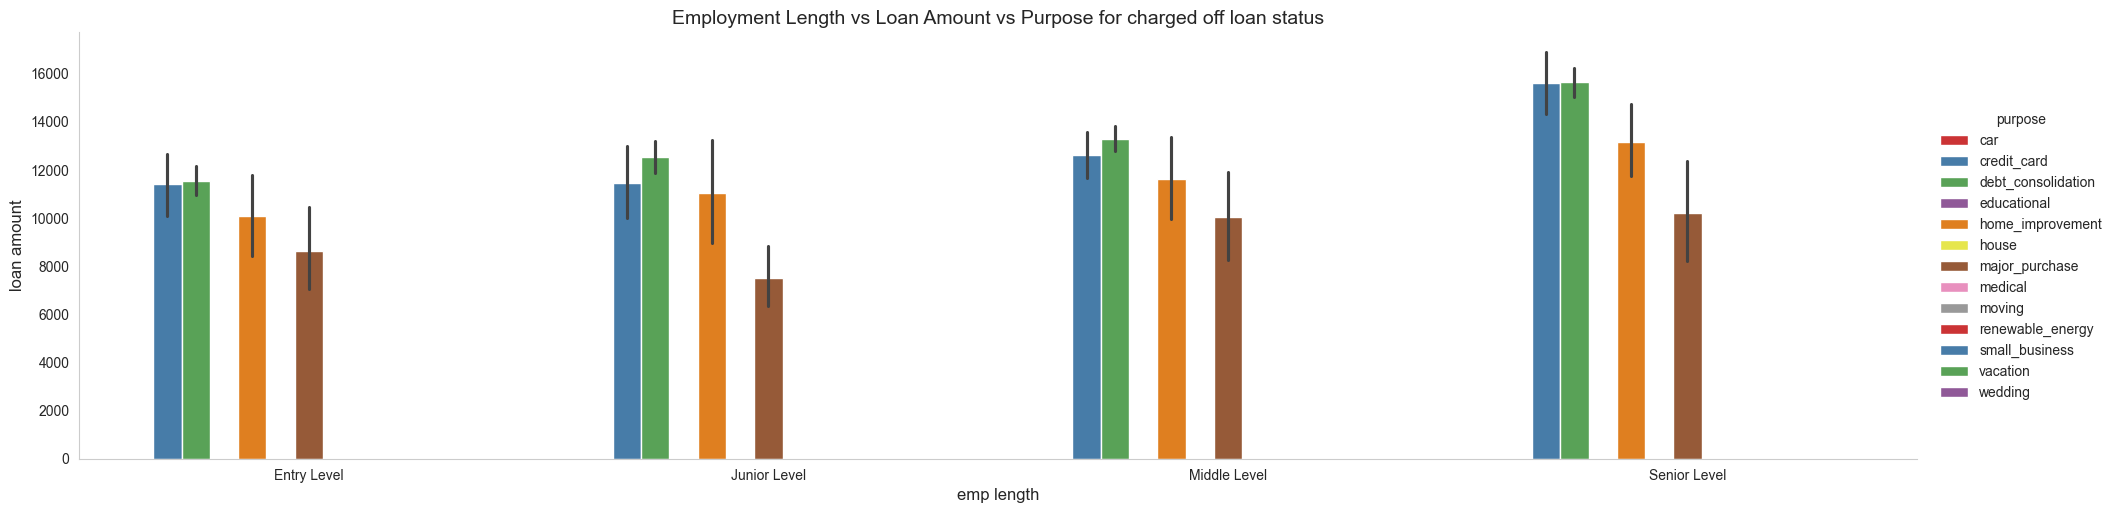

In [244]:
# Employment length vs loan Amount vs Purpose for charged off loan status

plot = sns.catplot(x="categorised_emp_length", y='loan_amnt', hue='purpose', kind="bar", data=charged_off_filtered_purpose_df,
                   palette="Set1", aspect= 3.9, order=order_emp_category);

plt.title('Employment Length vs Loan Amount vs Purpose for charged off loan status', fontsize = 14)
plt.xlabel("emp length", fontsize = 12)
plt.ylabel("loan amount", fontsize = 12)

# Print the counts
plt.show()

OBSERVATION<br> ***1. Applicants default most in small_business in 36 months term, in debt consolidation for term of 60 months. <br> 2. Applicants with salary in column Medium, High,Very High have dfaulted more in debt consolidation. <br> 3.Employee of all the range of employee length have majority charged off in debt_consolidation.***


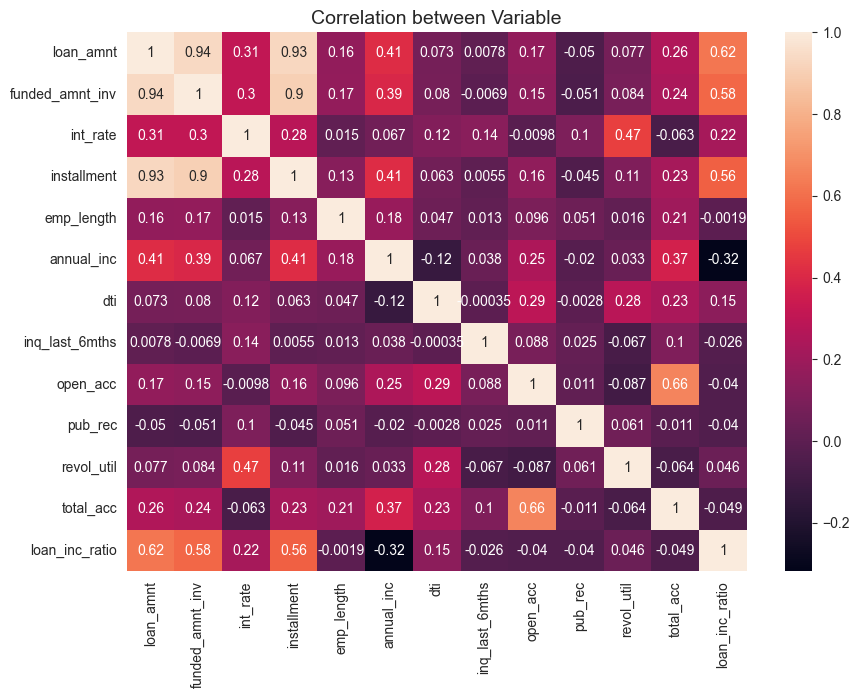

In [245]:
#Heatmap for correlation between variables
numeric_columns = loan_df.select_dtypes(include=['float64', 'int64'])

# Create the heatmap for numeric columns
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.title('Correlation between Variable', fontsize=14)
plt.show()

OBSERVATION - <br>***1. loan_amnt has negative correlation with pub_rec_bankrupticies<br>
2.annual income has a negative correlation with dti<br> 3.term has a strong correlation with loan amount<br>4.term has a strong correlation with interest rate<br>5.annual income has a strong correlation with loan_amount<br>6.pub_rec_bankruptcies has weak correlation with most of the fields***

### Overall Observations

1. Most loans are fully paid, and there are only a few that have defaulted.
2. Loan amounts range from $500 to $35,000, with an average of $9,800.
3. More than half of the loans have a term of 36 months, while fewer have a 60-month term.
4. The interest rates are concentrated around 5-10% and 10-15%, with a dip near 10%.
5. The majority of loans belong to high grades 'A' and 'B'.
6. Within grades 'A' and 'B', there are more lower subgrades, aligning with the overall grade distribution.
7. Most borrowers have work experience exceeding 10 years.
8. The majority of borrowers do not own property and are either on a mortgage or renting.
9. Annual income follows a left-skewed normal distribution, indicating that most borrowers have relatively low annual incomes.
10. About half of the borrowers are either company-verified or have their sources verified.
11. Debt consolidation is the most common reason for taking out a loan, followed by credit card debt.1
12. Many borrowers have a significant debt-to-income ratio, especially concentrated in the 10-15 range.
13. Most borrowers do not have a record of public bankruptcy.
14. The highest number of loans are approved in the last quarter of the year.
15. The number of approved loans shows an exponential increase over time, suggesting an increasing loan approval rate.

## Recommendations
- The major Driving factor/Driving Variables behing loan default are:
    1. Annual income 
    2. Grades
    3. Verification Status
    4. DTI
    5. Pub_rec_bankruptcies